# Homework 7 (50 points)

In this Homework, we will try to classify observations of space to be either stars, galaxies or quasars based on the RD14 from the Sloan Digital Sky Survey  (SDSS). The Sloan Digital Sky Survey is a project which offers public data of space observations. Observations have been made since 1998 and have been made accessible to everyone who is interested. 

http://www.sdss.org/
![alt text](http://www.fingerprintdigitalmedia.com/wp-content/uploads/2014/08/sdss1.jpg)

For this purpose a special 2.5 m diameter telescope was built at the Apache Point Observatory in New Mexico, USA. The telescope uses a camera of 30 CCD-Chips with 2048x2048 image points each. The chips are ordered in 5 rows with 6 chips in each row. Each row observes the space through different optical filters (u, g, r, i, z) at wavelengths of approximately 354, 476, 628, 769, 925 nm.


In this homework we will train several classifier to predict the class of a celestial object based on the observations (features). We will practice data prep, dimensionality reduction, model design and training, model comparison, and feature importance selection.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline


## 1) Data Preparation (20 points)

We follow the following steps:
* read (1 point)
* clean (3 points)
* correlate (4 points)
* explore, spread of values (3 points)
* dimensionality reduction (9 points)

### 1.1 Data read
Read the pandas data frame from the csv file "Skyserver_SQL2_27_2018.csv" and skip the first row.

**Task: read (1 point)**

Save a copy of the data frame just in case.

In [6]:
# answer

# I am not skipping it but I can using skiprows = 0
cat = pd.read_csv("Skyserver_SQL2_27_2018.csv")
cat

objid          ra        dec         u         g         r  \
0     1.237650e+18  183.531326   0.089693  19.47406  17.04240  15.94699   
1     1.237650e+18  183.598370   0.135285  18.66280  17.21449  16.67637   
2     1.237650e+18  183.680207   0.126185  19.38298  18.19169  17.47428   
3     1.237650e+18  183.870529   0.049911  17.76536  16.60272  16.16116   
4     1.237650e+18  183.883288   0.102557  17.55025  16.26342  16.43869   
...            ...         ...        ...       ...       ...       ...   
9995  1.237650e+18  131.316413  51.539547  18.81777  17.47053  16.91508   
9996  1.237650e+18  131.306083  51.671341  18.27255  17.43849  17.07692   
9997  1.237650e+18  131.552562  51.666986  18.75818  17.77784  17.51872   
9998  1.237650e+18  131.477151  51.753068  18.88287  17.91068  17.53152   
9999  1.237650e+18  131.665012  51.805307  19.27586  17.37829  16.30542   

             i         z   run  rerun  camcol  field     specobjid   class  \
0     15.50342  15.22531   752    301       4    267  3.722360e+18    STAR   
1     16.48922  16.39150   752    301       4    267  3.638140e+17    STAR   
2     17.08732  16.80125   752    301       4    268  3.232740e+17  GALAXY   
3     15.98233  15.90438   752    301       4    269  3.722370e+18    STAR   
4     16.55492  16.61326   752    301       4    269  3.722370e+18    STAR   
...        ...       ...   ...    ...     ...    ...           ...     ...   
9995  16.68305  16.50570  1345    301       3    161  5.033450e+17  GALAXY   
9996  16.71661  16.69897  1345    301       3    162  5.033400e+17  GALAXY   
9997  17.43302  17.42048  1345    301       3    162  8.222620e+18    STAR   
9998  17.36284  17.13988  1345    301       3    163  5.033400e+17  GALAXY   
9999  15.83548  15.50588  1345    301       3    163  5.033410e+17  GALAXY   

      redshift  plate    mjd  fiberid  
0    -0.000009   3306  54922      491  
1    -0.000055    323  51615      541  
2     0.123111    287  52023      513  
3    -0.000111   3306  54922      510  
4     0.000590   3306  54922      512  
...        ...    ...    ...      ...  
9995  0.027583    447  51877      246  
9996  0.117772    447  51877      228  
9997 -0.000402   7303  57013      622  
9998  0.014019    447  51877      229  
9999  0.118417    447  51877      233  

[10000 rows x 18 columns]

**Description of the data fields**

* objid = Object Identifier, self explanatory.
* ra = J2000 Right Ascension (r-band). Angular that is measured eastward along the celestial equator from the Sun at the March equinox to the hour circle of the point above the earth in question.   https://en.wikipedia.org/wiki/Right_ascension
* dec = J2000 Declination (r-band). Angle that is measured north or south of the celestial equator, along the hour circle passing through the point in question. https://en.wikipedia.org/wiki/Declination



The Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.

Further Information: http://astroweb.case.edu/ssm/ASTR620/mags.html 
* u = better of DeV/Exp magnitude fit
* g = better of DeV/Exp magnitude fit
* r = better of DeV/Exp magnitude fit
* i = better of DeV/Exp magnitude fit
* z = better of DeV/Exp magnitude fit




Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels. 
* run = Run Number, which identifies the specific scan. 
* rereun = Rerun Number, which specifies how the image was processed.
* camcol = Camera column, a number from 1 to 6, identifying the scanline within the run.
* field = Field number, which typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs.
* specobjid = Object Identifier
* class = object class (galaxy, star or quasar object): The class identifies an object to be either a galaxy, star or quasar. This will be the response variable which we will be trying to predict.

* redshift = Final Redshift: In physics, **redshift** happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum. 

* plate = plate number: Each spectroscopic exposure employs a large, thin, circular metal **plate** that positions optical fibers via holes drilled at the locations of the images in the telescope focal plane. These fibers then feed into the spectrographs. Each plate has a unique serial number, which is called plate in views such as SpecObj in the CAS.

* mjd = MJD of observation, **Modified Julian Date**, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.
* fiberid = fiber ID. The SDSS spectrograph uses optical fibers to direct the light at the focal plane from individual objects to the slithead. Each object is assigned a corresponding **fiberID**. 

**Further information on SDSS images and their attributes:** 

http://www.sdss3.org/dr9/imaging/imaging_basics.php

http://www.sdss3.org/dr8/glossary.php

### 1.2 Data Cleaning 

Basic stats about our dataset. 

**Task: Provide basic info for the pandas dataframe head (0.5 point)**

In [7]:
# head
cat.head()


objid          ra       dec         u         g         r         i  \
0  1.237650e+18  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342   
1  1.237650e+18  183.598370  0.135285  18.66280  17.21449  16.67637  16.48922   
2  1.237650e+18  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732   
3  1.237650e+18  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233   
4  1.237650e+18  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492   

          z  run  rerun  camcol  field     specobjid   class  redshift  plate  \
0  15.22531  752    301       4    267  3.722360e+18    STAR -0.000009   3306   
1  16.39150  752    301       4    267  3.638140e+17    STAR -0.000055    323   
2  16.80125  752    301       4    268  3.232740e+17  GALAXY  0.123111    287   
3  15.90438  752    301       4    269  3.722370e+18    STAR -0.000111   3306   
4  16.61326  752    301       4    269  3.722370e+18    STAR  0.000590   3306   

     mjd  fiberid  
0  54922      491  
1  51615      541  
2  52023      513  
3  54922      510  
4  54922      512

In [8]:
cat.describe()

objid            ra           dec             u             g  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000  10000.000000   
mean   1.237650e+18    175.529987     14.836148     18.619355     17.371931   
std    0.000000e+00     47.783439     25.212207      0.828656      0.945457   
min    1.237650e+18      8.235100     -5.382632     12.988970     12.799550   
25%    1.237650e+18    157.370946     -0.539035     18.178035     16.815100   
50%    1.237650e+18    180.394514      0.404166     18.853095     17.495135   
75%    1.237650e+18    201.547279     35.649397     19.259232     18.010145   
max    1.237650e+18    260.884382     68.542265     19.599900     19.918970   

                  r             i             z           run    rerun  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.0   
mean      16.840963     16.583579     16.422833    981.034800    301.0   
std        1.067764      1.141805      1.203188    273.305024      0.0   
min       12.431600     11.947210     11.610410    308.000000    301.0   
25%       16.173333     15.853705     15.618285    752.000000    301.0   
50%       16.858770     16.554985     16.389945    756.000000    301.0   
75%       17.512675     17.258550     17.141447   1331.000000    301.0   
max       24.802040     28.179630     22.833060   1412.000000    301.0   

             camcol         field     specobjid      redshift         plate  \
count  10000.000000  10000.000000  1.000000e+04  10000.000000  10000.000000   
mean       3.648700    302.380100  1.645022e+18      0.143726   1460.986400   
std        1.666183    162.577763  2.013998e+18      0.388774   1788.778371   
min        1.000000     11.000000  2.995780e+17     -0.004136    266.000000   
25%        2.000000    184.000000  3.389248e+17      0.000081    301.000000   
50%        4.000000    299.000000  4.966580e+17      0.042591    441.000000   
75%        5.000000    414.000000  2.881300e+18      0.092579   2559.000000   
max        6.000000    768.000000  9.468830e+18      5.353854   8410.000000   

                mjd       fiberid  
count  10000.000000  10000.000000  
mean   52943.533300    353.069400  
std     1511.150651    206.298149  
min    51578.000000      1.000000  
25%    51900.000000    186.750000  
50%    51997.000000    351.000000  
75%    54468.000000    510.000000  
max    57481.000000   1000.000000

**Task: Find the data types of the database (floats, string, etc etc) using the ``info()`` function (0.5 point).**

In [9]:
# information
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


Are there any obvious feature (or element of the dataframe) that should not impact our prediction?
 
**objid** and **specobjid** are just identifiers for accessing the rows back when they were stored in the original databank. Therefore we will not need them for classification as they are not related to the outcome.
The features **run**, **rerun**, **camcol** and **field** are values which describe parts of the camera at the moment when making the observation, e.g. 'run' represents the corresponding scan which captured the oject.

Source: http://www.sdss3.org/dr9/imaging/imaging_basics.php

**Task: Drop these columns in the pandas dataframe. (1 point)**

In [13]:
# answer
cat_mod = cat.drop(columns=['objid','specobjid','run','rerun','camcol', 'field'])

In [14]:
cat_mod

ra        dec         u         g         r         i         z  \
0     183.531326   0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1     183.598370   0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2     183.680207   0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3     183.870529   0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4     183.883288   0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   
...          ...        ...       ...       ...       ...       ...       ...   
9995  131.316413  51.539547  18.81777  17.47053  16.91508  16.68305  16.50570   
9996  131.306083  51.671341  18.27255  17.43849  17.07692  16.71661  16.69897   
9997  131.552562  51.666986  18.75818  17.77784  17.51872  17.43302  17.42048   
9998  131.477151  51.753068  18.88287  17.91068  17.53152  17.36284  17.13988   
9999  131.665012  51.805307  19.27586  17.37829  16.30542  15.83548  15.50588   

       class  redshift  plate    mjd  fiberid  
0       STAR -0.000009   3306  54922      491  
1       STAR -0.000055    323  51615      541  
2     GALAXY  0.123111    287  52023      513  
3       STAR -0.000111   3306  54922      510  
4       STAR  0.000590   3306  54922      512  
...      ...       ...    ...    ...      ...  
9995  GALAXY  0.027583    447  51877      246  
9996  GALAXY  0.117772    447  51877      228  
9997    STAR -0.000402   7303  57013      622  
9998  GALAXY  0.014019    447  51877      229  
9999  GALAXY  0.118417    447  51877      233  

[10000 rows x 12 columns]

Find our how many examples there are, how many attributes or feature, and the type of class.

In [15]:
# description

np.unique(cat_mod['class'])

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

 #### There are three types of classes.  - GALAXY, QSO, STAR
 
#### There are 8 features that are controlled by the event. All in the above dataframe except - class, plate, mjd, fiberid

**Task: How many objects are in each class? (1 point)**

<AxesSubplot: >

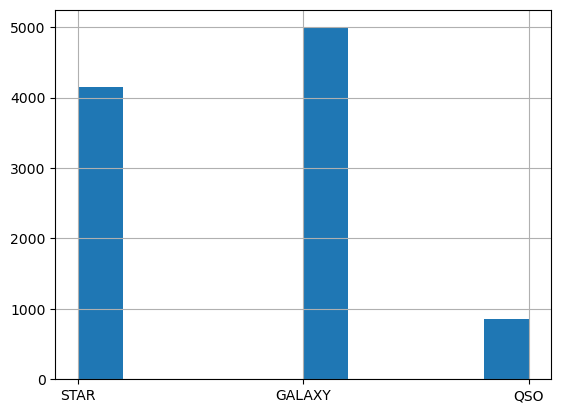

In [17]:
# Count the elements in each class
cat_mod['class'].hist()

array([4152., 4998.,  850.])

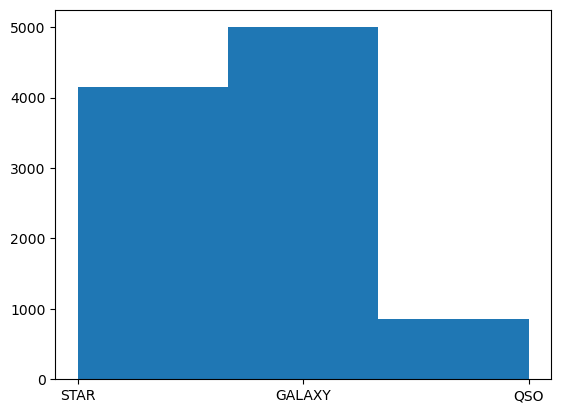

In [26]:
plt.hist(cat_mod['class'], bins=3)[0]

The classes are "GALAXY", "STAR", and "QSO" (quasars). They are defined as strings, but we will convert them to integer in order to apply a loss function on the class labels during training. For this, we use the ``sklearn.preprocessing.LabelEncoder()`` function. We will do so and modify the classes in the dataframe. We should keep a copy of the original data frame to be safe.

In [29]:
sdss_df = cat_mod
sdss_df_save = sdss_df # make a copy of the original data before cleaning it. That works well when the data is small.

# encode class labels to integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(sdss_df['class'])
sdss_df['class'] = y_encoded
#  GALAXY = 0
# STAR = 2
# QSO = 1
sdss_features = sdss_df_save.drop(columns=['class','plate','mjd','fiberid'])
sdss_features

ra        dec         u         g         r         i         z  \
0     183.531326   0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1     183.598370   0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2     183.680207   0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3     183.870529   0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4     183.883288   0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   
...          ...        ...       ...       ...       ...       ...       ...   
9995  131.316413  51.539547  18.81777  17.47053  16.91508  16.68305  16.50570   
9996  131.306083  51.671341  18.27255  17.43849  17.07692  16.71661  16.69897   
9997  131.552562  51.666986  18.75818  17.77784  17.51872  17.43302  17.42048   
9998  131.477151  51.753068  18.88287  17.91068  17.53152  17.36284  17.13988   
9999  131.665012  51.805307  19.27586  17.37829  16.30542  15.83548  15.50588   

      redshift  
0    -0.000009  
1    -0.000055  
2     0.123111  
3    -0.000111  
4     0.000590  
...        ...  
9995  0.027583  
9996  0.117772  
9997 -0.000402  
9998  0.014019  
9999  0.118417  

[10000 rows x 8 columns]

### 1.3 Data correlations
Now let's find the most basic correlations among features. This can be done using the ``corr()`` function to apply on the pandas dataframe. Evaluate this function and comment on what feature is correlated among others. It is convenient to use the matplotlib function ``matshow()`` for clarity. ``seaborn`` is a python module that makes really pretty statistical plots https://seaborn.pydata.org/index.html#. Install it with ``pip`` and import it.

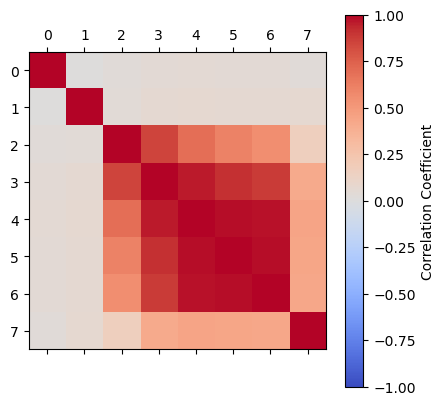

In [50]:
plt.matshow(sdss_features.corr(), vmin=-1, vmax = 1, cmap = 'coolwarm')
plt.colorbar(label='Correlation Coefficient')

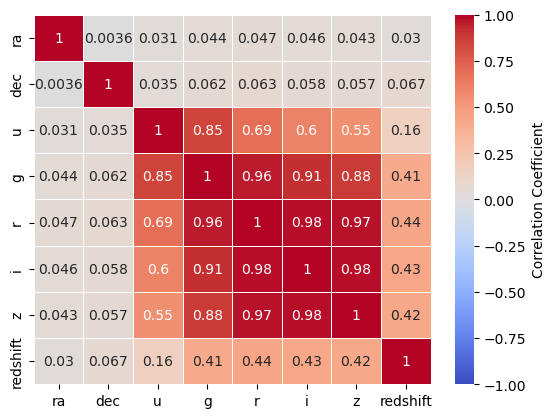

In [49]:
import seaborn as sns
ax = sns.heatmap(sdss_features.corr(), annot=True, linewidth=.5, cmap = 'coolwarm', vmin=-1, vmax=1)
ax.collections[0].colorbar.set_label("Correlation Coefficient")

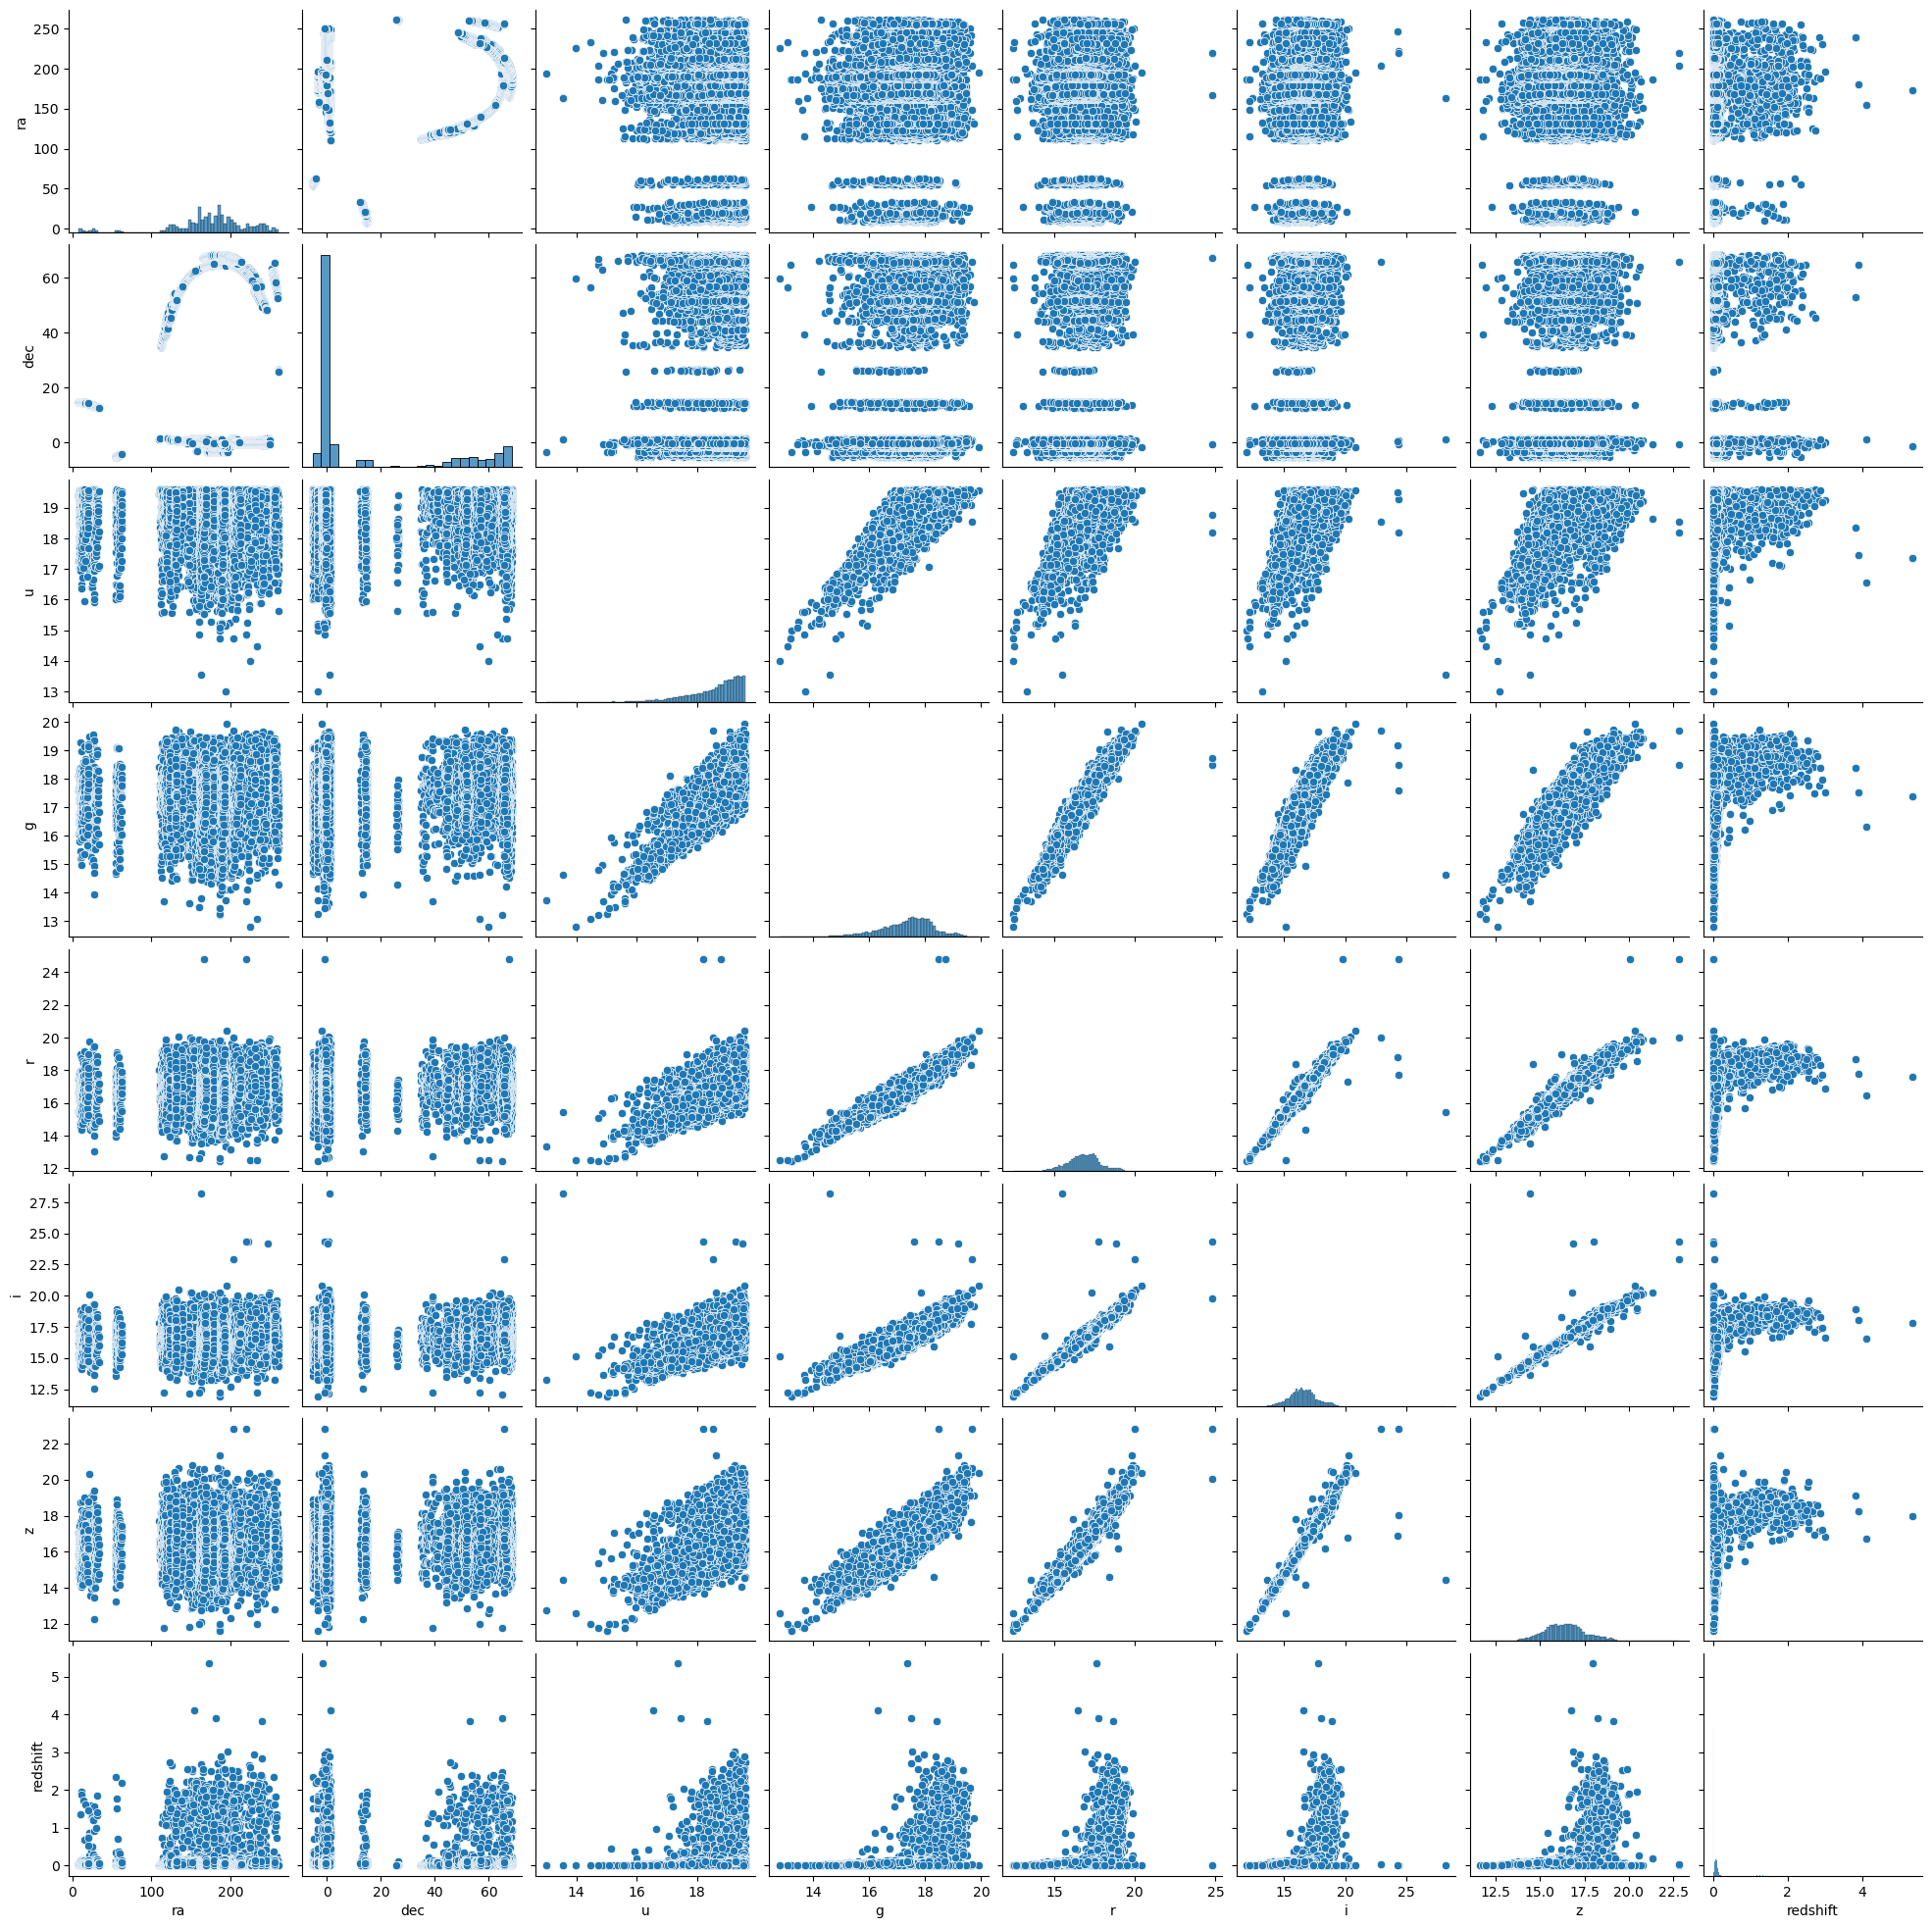

In [44]:
sns.pairplot(sdss_features)

**Task: Plot the correlation matrix that can be called in the pandas dataframe. (2 points)**

Hints:

Use functions of ``heatmap``, add the labels in the axes. The colormap ``coolwarm`` is nice for divergent scales like correlations that vary between -1 and 1. The argument ``center=0`` ensures that the colormap is divergent from zero. Make sure to ignore the label column "class". Remember that dropping a column can be done in place ``sdss_df.drop('class', axis=1)``.

In [51]:
# answer


**Task: Reproduce the same plot for each of the three classes. (1 point)**
You can select the values from the pandas dataframe by selecting over the column 'class'. 

In [ ]:
# make the same plot for Galaxies
# "GALAXY" is label 0

# Make the same plot for Stars (label 1)

# make the same plots for quasars (label 2)

In [54]:
sdss_galaxy = sdss_features.iloc[np.where(y_encoded == 0)[0]]
sdss_qso = sdss_features.iloc[np.where(y_encoded == 1)[0]]
sdss_star = sdss_features.iloc[np.where(y_encoded == 2)[0]]

Text(0.5, 1.0, 'Galaxy')

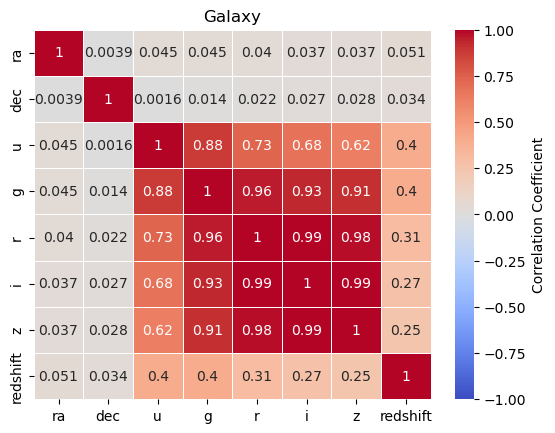

In [59]:
ax = sns.heatmap(sdss_galaxy.corr(), annot=True, linewidth=.5, cmap = 'coolwarm', vmin=-1, vmax=1)
ax.collections[0].colorbar.set_label("Correlation Coefficient")
ax.set_title('Galaxy')

Text(0.5, 1.0, 'QSO')

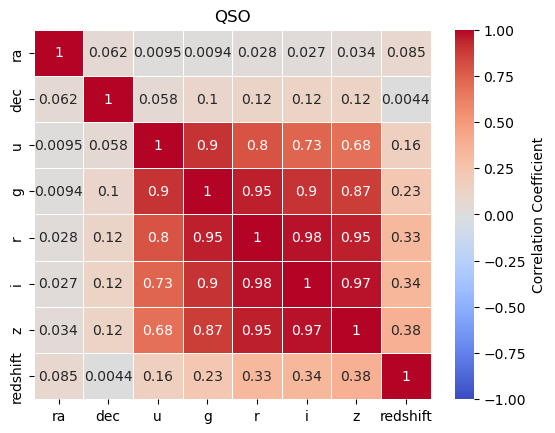

In [60]:
ax = sns.heatmap(sdss_qso.corr(), annot=True, linewidth=.5, cmap = 'coolwarm', vmin=-1, vmax=1)
ax.collections[0].colorbar.set_label("Correlation Coefficient")
ax.set_title('QSO')

Text(0.5, 1.0, 'STAR')

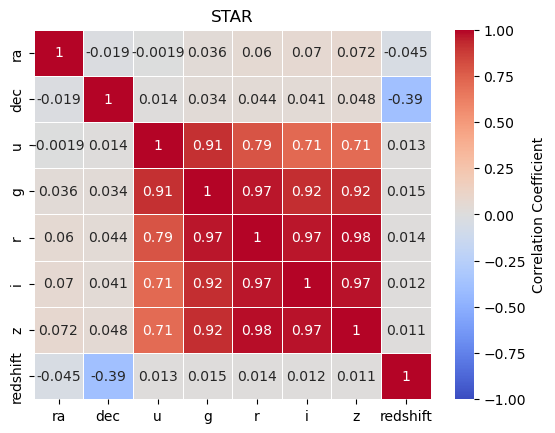

In [62]:
ax = sns.heatmap(sdss_star.corr(), annot=True, linewidth=.5, cmap = 'coolwarm', vmin=-1, vmax=1)
ax.collections[0].colorbar.set_label("Correlation Coefficient")
ax.set_title('STAR')

**Task: Can you comment on groups of observations that can be grouped together or that appear independent from each other given these correlations, and if there is any difference between the three celestial objects? (**1 point**)**

##### The features - 'u', 'g', 'r', 'i' and 'z' appear to be highly correlated with each other and show very low correlation with 'redshift' and 'dec'. The correlation coefficient of the latter with other variables increasingly lowers from GALAXY to QSO to STAR. 

##### A negative correlation is observed between 'redshift' and 'dec'. 

### 1.5 Data exploration
Given the structure of the correlations, we will explore the values of the data.

#### 1.5.a. Distributions of redshift
"redshifting" happens when the source of light is becoming more distant to the receiver: the object is moving away from Earth. 

**Task: plot histograms for the 'redshift' feature column for each class (1 point).**

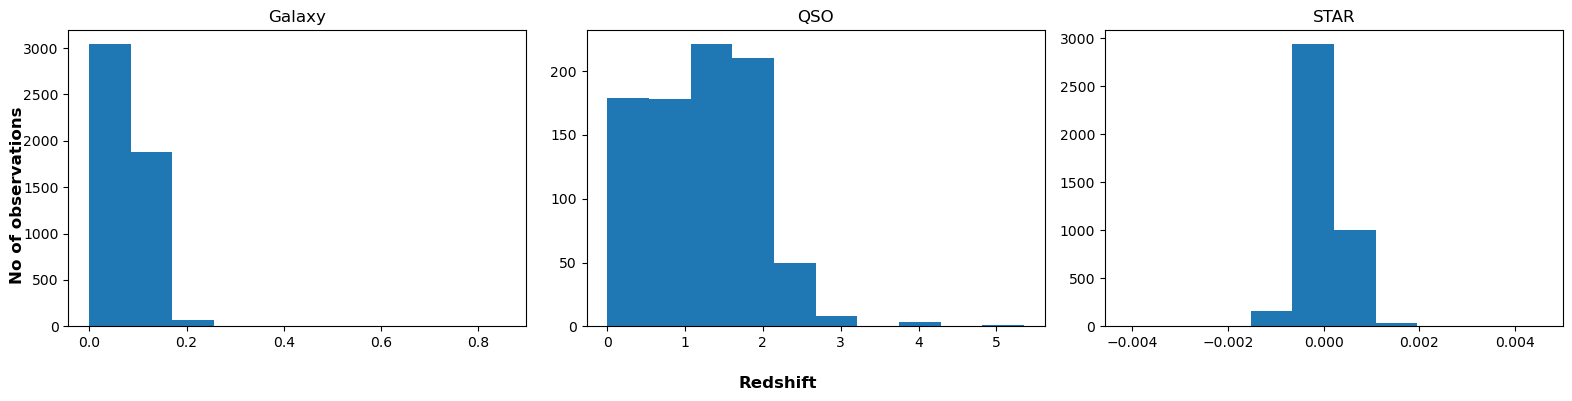

In [74]:
# answer
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))

axes[0].hist(sdss_galaxy['redshift'])
axes[0].set_title('Galaxy')

axes[1].hist(sdss_qso['redshift'])
axes[1].set_title('QSO')

axes[2].hist(sdss_star['redshift'])
axes[2].set_title('STAR')

fig.supylabel('No of observations',fontsize=12, fontweight='bold')
fig.supxlabel('Redshift',fontsize=12, fontweight='bold')
fig.show()
fig.tight_layout()


**Task : Describe briefly the difference between the three histograms. (0.5 point)**

<!-- # answer -->
* **Star:** The histogram looks like a truncated zero-centered normal distribution. It looks like stars are both coming toward and away from the Earth.

* **Galaxy:** The redshift values may come from a slightly right-shifted normal distribution which is centered around 0.075. It looks like galaxies are moving away from the Earth but at slow speeds.

* **QSO:** The redshift values for QSOs are a lot more uniformly distributed than for Stars or Galaxies. They are roughly evenly distributed from 0 to 3, than the occurences decrease drastically. For 4 oder ~5.5 there are some outliers. This probably means that quasards are moving away from the earth with a diverse range of speeds.


#### 1.5.b. Right ascension (ra) and declination (dec) 

We will now plot the right ascension versus the declination depending on the class. You can use the ``lmplot`` function in ``seaborn`` (https://seaborn.pydata.org/generated/seaborn.lmplot.html) to represent the sky view of these objects.

Text(0.5, 1.0, 'Equatorial coordinates')

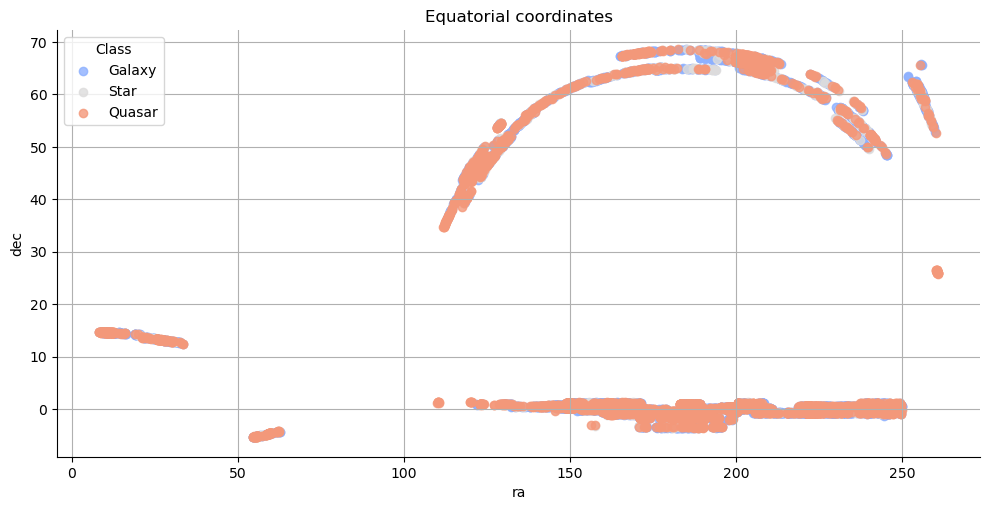

In [84]:
sns.lmplot(x='ra', y='dec', data=sdss_df, hue='class', fit_reg=False, palette='coolwarm',  aspect=2,legend=False)
plt.legend(title='Class', loc='upper left', labels=['Galaxy', 'Star','Quasar'])
plt.grid(True)
plt.title('Equatorial coordinates')

**Task: do you see any obvious differences such that one could easily discriminate between the two coordinates? (0.5 point)**

##### There are two clusters but it is not easy to differentiate individual classes based on these two features. 

#### 1.5.c Filters - u,g,r,i,z 

Recall: u, g, r, i, z represent the different wavelengths which are used to capture the observations. According to the correlation matrix, they are correlated for all three classes.

Therefore it is interesting to see that band 'u' is less correlated to the other bands. 

**Task Plot histograms and discuss why you expect these features to be correlated (1 points)**

###### I honestly dont know but my best guess is brighter light will mean more intense colors, so all the colors are increasing or decreasing in the same manner based on the intensity of light. 

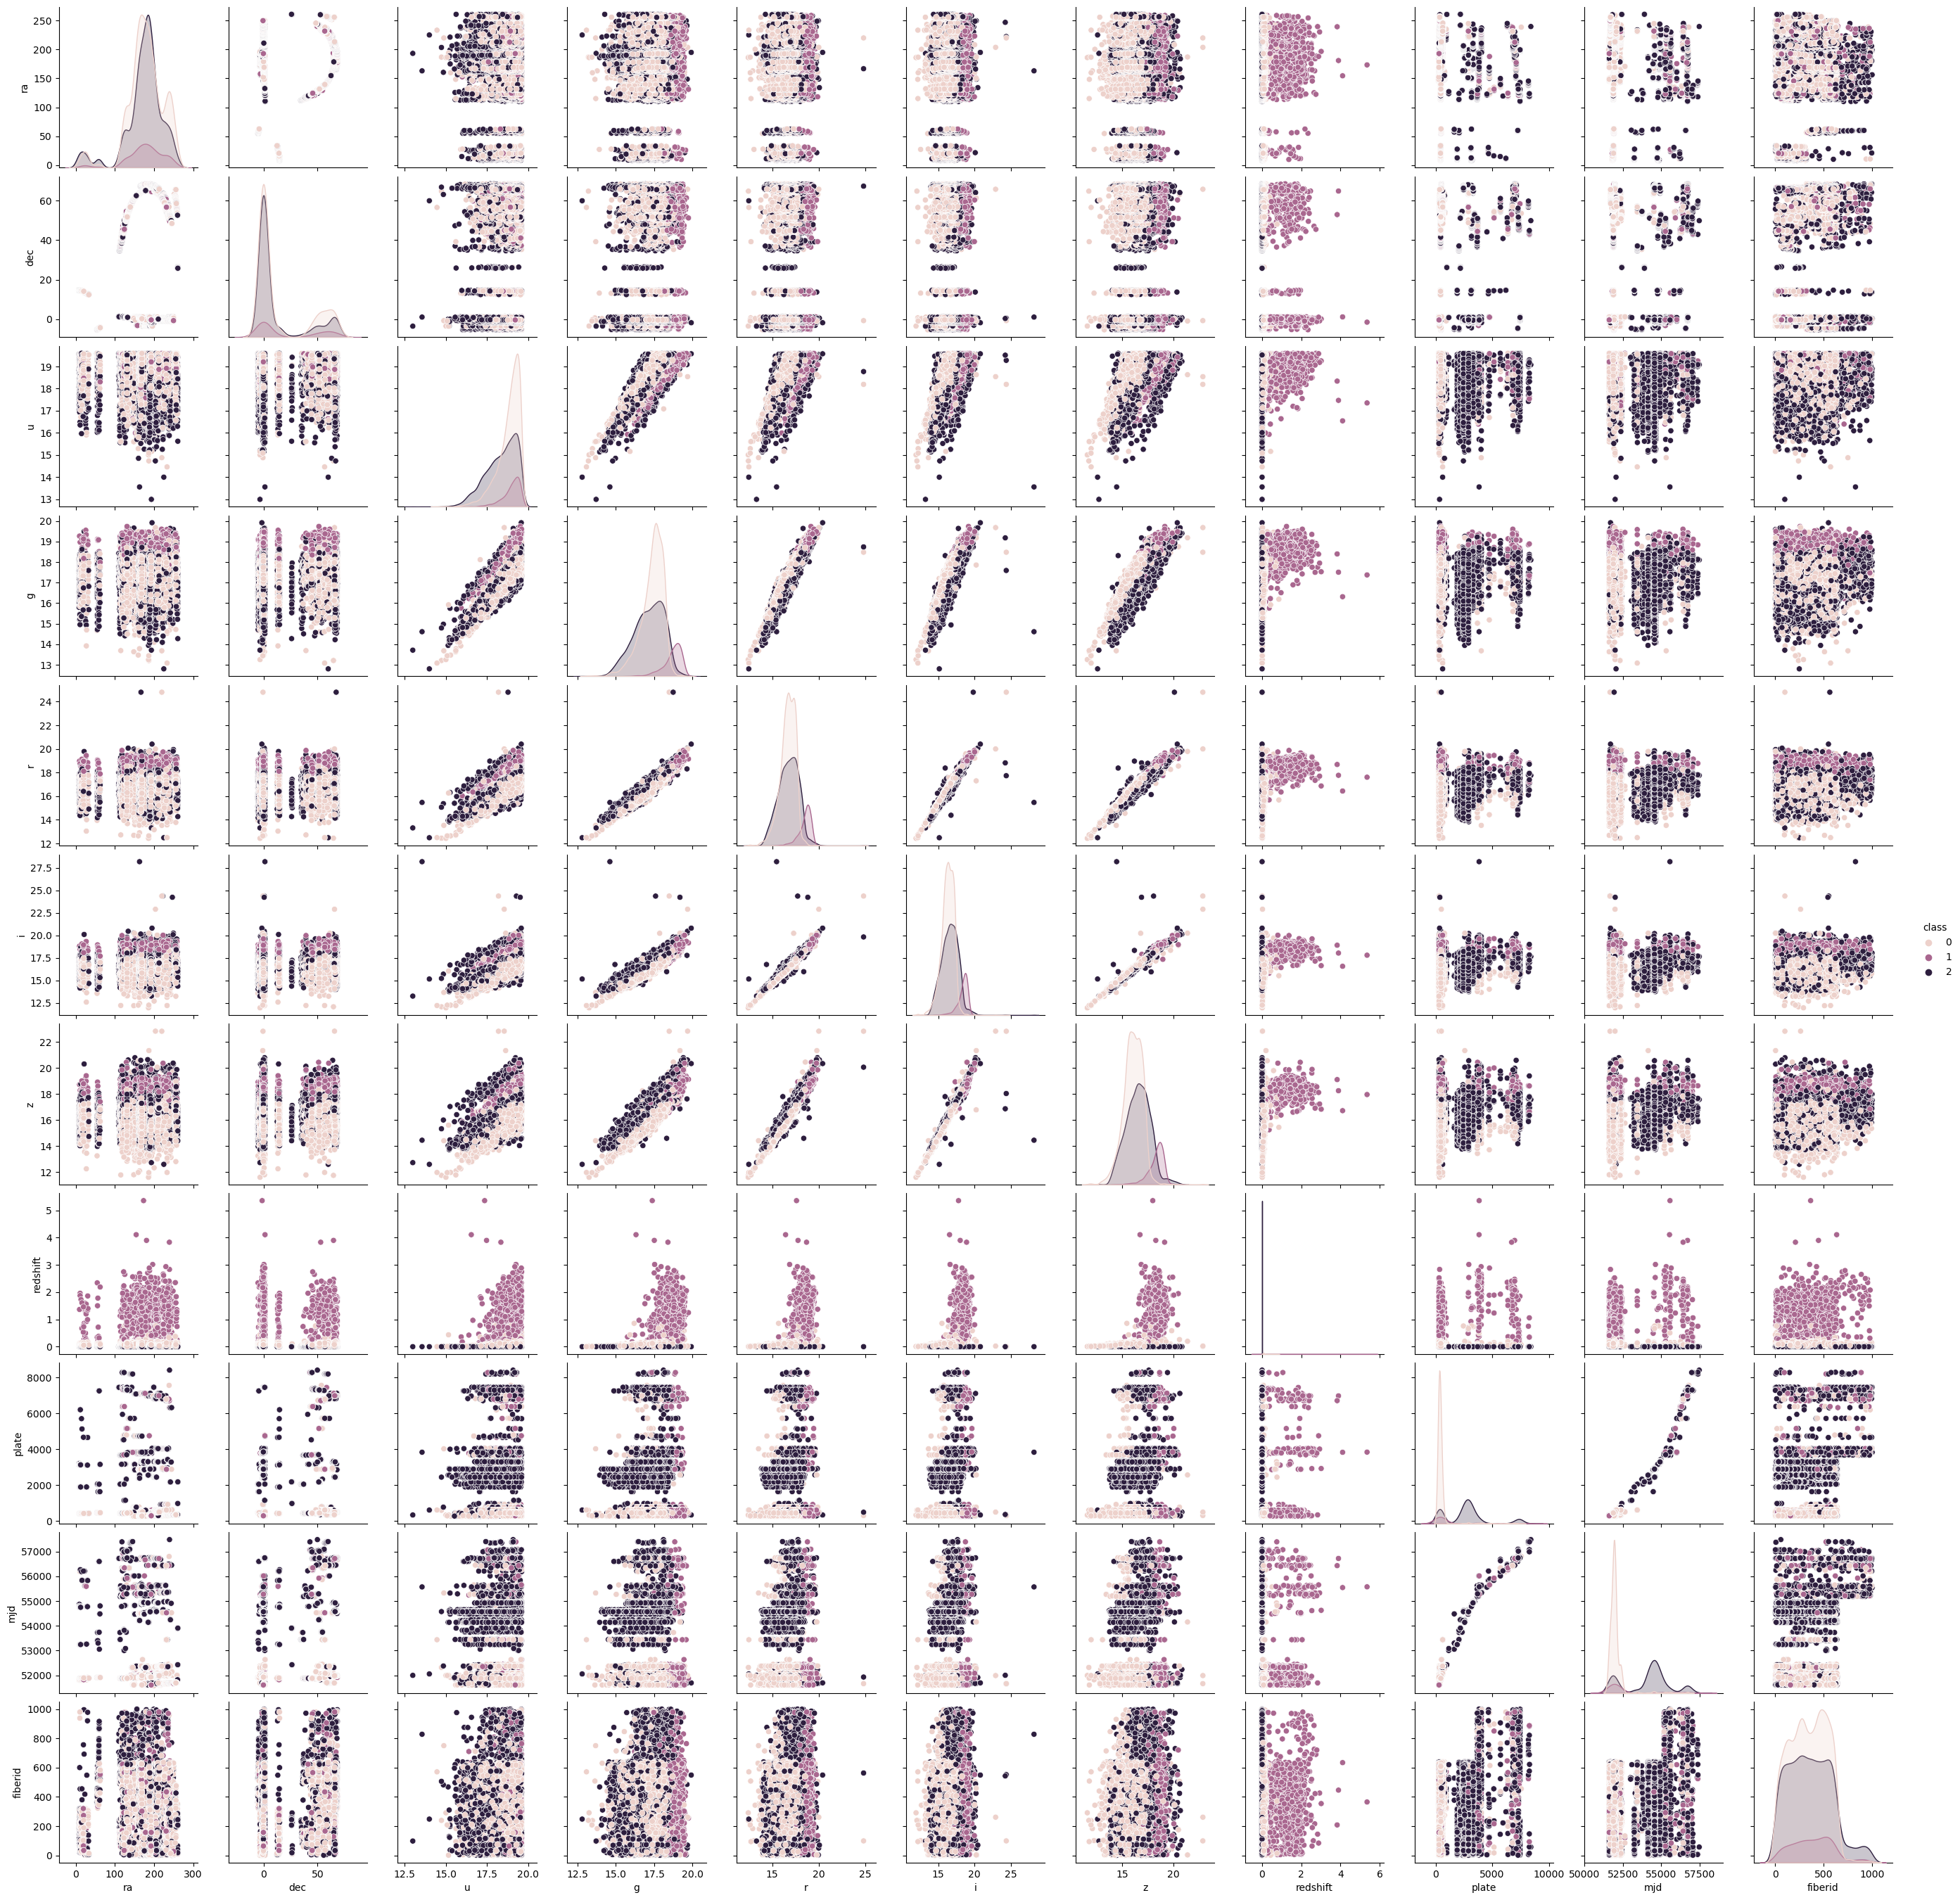

In [85]:
# Plot of histograms
import warnings
warnings.filterwarnings('ignore')


sns.pairplot(sdss_df, hue='class')

<!-- Anwer: -->

### 1.6 Data Dimensionality Reduction
At this point, we are left with 8 features: redshift, u, g, r, i, z, ra, and dec. Among these, the filters (u, g, r, i, z) are correlated to each other. There is therefore a potential for reducing the dimensions of the features using PCA on these 5 features.

We will use the skilearn function ``sklearn.decomposition.PCA()`` to fit and transform the data into the PC coordinates. Lets' first explore how many PCs we need. Fit the PCA function over the total number of filters. You will fit the PCA function over an array with the columns selected from the dataframe. 

**Task: Perform the PCA over a max number of PCs, output the explained variance ratio values, decide on an appropriate maximum number of PC to use (6 points)**

In [87]:
# anwer
sdss_filters = sdss_features[['u','g','r','i','z']]
sdss_filters

u         g         r         i         z
0     19.47406  17.04240  15.94699  15.50342  15.22531
1     18.66280  17.21449  16.67637  16.48922  16.39150
2     19.38298  18.19169  17.47428  17.08732  16.80125
3     17.76536  16.60272  16.16116  15.98233  15.90438
4     17.55025  16.26342  16.43869  16.55492  16.61326
...        ...       ...       ...       ...       ...
9995  18.81777  17.47053  16.91508  16.68305  16.50570
9996  18.27255  17.43849  17.07692  16.71661  16.69897
9997  18.75818  17.77784  17.51872  17.43302  17.42048
9998  18.88287  17.91068  17.53152  17.36284  17.13988
9999  19.27586  17.37829  16.30542  15.83548  15.50588

[10000 rows x 5 columns]

In [97]:
from sklearn.decomposition import PCA
X = np.array(sdss_filters)
pca = PCA().fit(X)


In [100]:
pca.explained_variance_ratio_

array([0.90265505, 0.08753264, 0.00458021, 0.0040977 , 0.0011344 ])

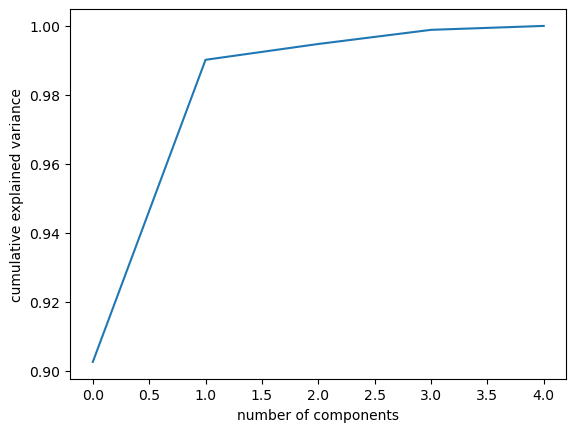

In [101]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

*Answer on how many PCs to use*

## Just One component is good enough as it captures over 98%

We will now re-perform PCA with the number of PCs you found is most appropriate. Re-apply the fit-transform function. Update the dataframe by adding the PCA value(s) and dropping the columns of the 5 filter features.

**Task: PCA again, fit and transform, update the dataframe with the new feature(s) (3 points)**

In [105]:
# answer
reduced  = PCA(n_components=1).fit_transform(X)
reduced

array([[-1.50720246],
       [-0.19575756],
       [ 1.29760442],
       ...,
       [ 1.48072524],
       [ 1.39208832],
       [-0.93620507]])

In [109]:
# answer
sdss_features['reduced'] = reduced
sdss_final = sdss_features.drop(columns=['u','g','r','i','z'])
sdss_final

ra        dec  redshift   reduced
0     183.531326   0.089693 -0.000009 -1.507202
1     183.598370   0.135285 -0.000055 -0.195758
2     183.680207   0.126185  0.123111  1.297604
3     183.870529   0.049911 -0.000111 -1.446117
4     183.883288   0.102557  0.000590 -0.849271
...          ...        ...       ...       ...
9995  131.316413  51.539547  0.027583  0.222959
9996  131.306083  51.671341  0.117772  0.259171
9997  131.552562  51.666986 -0.000402  1.480725
9998  131.477151  51.753068  0.014019  1.392088
9999  131.665012  51.805307  0.118417 -0.936205

[10000 rows x 4 columns]

### SDSS_Final is the updated dataframe

## 2) Machine Learning Models (26 points)

We will now train different models on this dataset. We have a total of 8 features, 3 classes, and 10,000 samples. We will use K-Nearest Neighbors, Naive Bayes, Random Forest, Support Vector Machine, Multi Layer Perceptron.

We now follow a normal machine learning workflow:
* Feature scaling (2 points)
* Train/test set split (2 points)
* Model design, training, testing (15 points)
* Model comparisons, pick your winner, discuss feature importance using Random Forest. (10 points)

### 2.1 Feature Scaling
Scaling all values to be within the (0, 1) interval will reduce the distortion due to exceptionally high values and make some algorithms converge faster. You can scale the features only by dropping the "class" column without modifying the dataframe in place, using the pandas function ``drop()``.

**Task: Scale just the features (2 points)**

In [119]:
# answer

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sdss_scaled_features = scaler.fit_transform(sdss_features)

sdss_scaled = pd.DataFrame(sdss_scaled_features, columns = sdss_features.columns)
sdss_normalized = sdss_scaled.drop(columns='reduced')

In [121]:
y_encoded

array([2, 2, 0, ..., 2, 0, 0])

### 2.2 Test, train, validation data sets.
**Task: Split the data into a training and a test part.  (2 points)**

The models will be trained on the training data set and tested on the test data set

In [122]:
# answer
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sdss_normalized, y_encoded, test_size=0.33, random_state=42)

Computation time is important to account for when scaling up the data set and the model size. You can evaluate the relative computational time using the function ``time.perf_counter()`` to evaluate the absolute time. Then compare the computational time by making the difference between two time stamps:

``t1=time.perf_counter()``

``t2=time.perf_counter()``

``tcomp = t2 - t1``

We will also assess the model performance of these multi-class classifiers. We will evaluate the average of the scores over the 3 class labels.

In [124]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_predict
label_name = ['Galaxy','Quasar','Star']

In the following, we will be testing over several classifiers. Follow the steps:
1. model definition/design
2. training
3. prediction on test
4. evaluation: a) print the classification_report; b) save the precision, recall, fscore and accuracy in variables

### 2.3.a K Nearest Neighbors (3 points)
Check out the function arguments and definition here: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Classifying using K-nearest Neighbors
              precision    recall  f1-score   support

      Galaxy       0.89      0.88      0.88      1252
      Quasar       0.97      0.90      0.94       216
        Star       0.86      0.88      0.87      1032

    accuracy                           0.88      2500
   macro avg       0.90      0.89      0.90      2500
weighted avg       0.88      0.88      0.88      2500



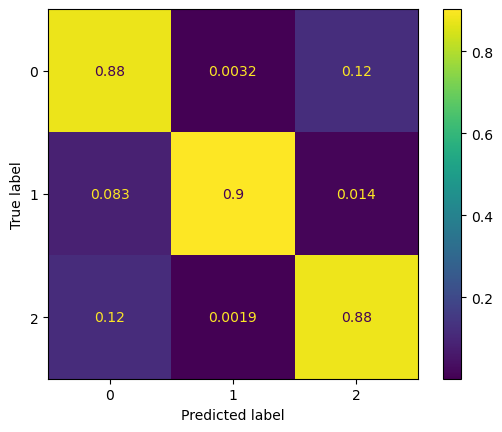

In [171]:
#answer
from sklearn.neighbors import KNeighborsClassifier
print("Classifying using K-nearest Neighbors")

# model design
neigh = KNeighborsClassifier(n_neighbors=3)

# training
neigh.fit(X_train, y_train)

# evaluation on test
y_predict = neigh.predict(X_test)


plot_confusion_matrix(neigh, X_test, y_test, normalize='true') 
# print the classification report
print(classification_report(y_test, y_predict, target_names = label_name, output_dict=False))
                      
                      
# save values of precision, recall, fscore, accuracy.
report_kne = classification_report(y_test, y_predict, target_names = label_name, output_dict=True)
prec_kne, rec_kne, f1_kne, _ = score(y_test, y_predict, average='weighted')

### 2.3.b Naive Bayes (3 points)
Check out the sklearn tutorial pages here: https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes. We propose to use the Gaussian Naive Bayes.

Naive Bayes assumes the data to be normally distributed which can be achieved by scaling using the MaxAbsScaler. For this example then we will use the unscaled data, then rescale it.

Classifying using Gaussian Naive Bayes
              precision    recall  f1-score   support

      Galaxy       0.99      0.98      0.98      1633
      Quasar       0.90      0.95      0.92       320
        Star       0.99      0.99      0.99      1347

    accuracy                           0.98      3300
   macro avg       0.96      0.97      0.97      3300
weighted avg       0.98      0.98      0.98      3300



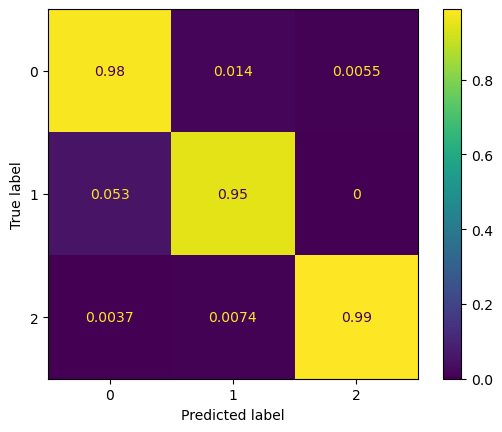

In [172]:
# answer
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MaxAbsScaler
print("Classifying using Gaussian Naive Bayes")



# re-scale the data
scaler = MaxAbsScaler()
sdss_scaled_features = scaler.fit_transform(sdss_features)
sdss_scaled = pd.DataFrame(sdss_scaled_features, columns = sdss_features.columns)
sdss_normalized = sdss_scaled.drop(columns='reduced')


# Split into test and training
X_train, X_test, y_train, y_test = train_test_split(sdss_normalized, y_encoded, test_size=0.33, random_state=42)


# model design

# Fitting the model to training data
scaler_gnb = GaussianNB()
scaler_gnb.fit(X_train, y_train)


# Testing the model on test data
y_predict = scaler_gnb.predict(X_test)


plot_confusion_matrix(scaler_gnb, X_test, y_test, normalize='true') 
# print the classification report
print(classification_report(y_test, y_predict, target_names = label_name, output_dict=False))

# save values of precision, recall, fscore, accuracy.
report_gnb = classification_report(y_test, y_predict, target_names = label_name, output_dict=True)
prec_gnb, rec_gnb, f1_gnb, _ = score(y_test, y_predict, average='weighted')

### 2.3.c Random Forest Classifier (2 points)
Check out the tutorial page here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Classifying using Random Forest Classifiers
              precision    recall  f1-score   support

      Galaxy       0.99      0.99      0.99      1633
      Quasar       0.99      0.94      0.96       320
        Star       0.99      1.00      1.00      1347

    accuracy                           0.99      3300
   macro avg       0.99      0.98      0.98      3300
weighted avg       0.99      0.99      0.99      3300



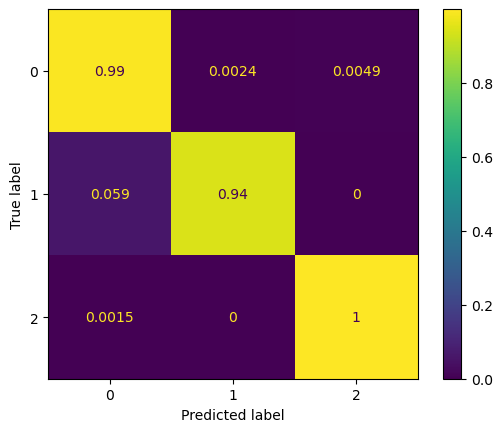

In [173]:
# answer
from sklearn.ensemble import RandomForestClassifier
print("Classifying using Random Forest Classifiers")

# re-scale the data
scaler = MinMaxScaler()
sdss_scaled_features = scaler.fit_transform(sdss_features)
sdss_scaled = pd.DataFrame(sdss_scaled_features, columns = sdss_features.columns)
sdss_normalized = sdss_scaled.drop(columns='reduced')


# Split into test and training
X_train, X_test, y_train, y_test = train_test_split(sdss_normalized, y_encoded, test_size=0.33, random_state=42)


# model design

# Fitting the model to training data
scaler_rf = RandomForestClassifier()
scaler_rf.fit(X_train, y_train)


# Testing the model on test data
y_predict = scaler_rf.predict(X_test)


plot_confusion_matrix(scaler_rf, X_test, y_test, normalize='true') 
# print the classification report
print(classification_report(y_test, y_predict, target_names = label_name, output_dict=False))

# save values of precision, recall, fscore, accuracy.
report_rf = classification_report(y_test, y_predict, target_names = label_name, output_dict=True)
prec_rf, rec_rf, f1_rf, _ = score(y_test, y_predict, average='weighted')

### 2.3.d Support Vector Machine Classifier (2 points)
Check out the sklearn information page here: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

Classifying using Support Vector Machine Classfiers
              precision    recall  f1-score   support

      Galaxy       0.95      0.89      0.92      1633
      Quasar       0.99      0.91      0.95       320
        Star       0.88      0.97      0.92      1347

    accuracy                           0.92      3300
   macro avg       0.94      0.92      0.93      3300
weighted avg       0.93      0.92      0.92      3300



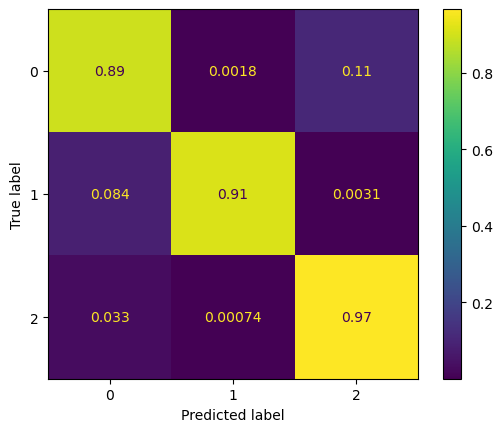

In [174]:
# answer
from sklearn.svm import SVC
print("Classifying using Support Vector Machine Classfiers")

# re-scale the data
scaler = MinMaxScaler()
sdss_scaled_features = scaler.fit_transform(sdss_features)
sdss_scaled = pd.DataFrame(sdss_scaled_features, columns = sdss_features.columns)
sdss_normalized = sdss_scaled.drop(columns='reduced')


# Split into test and training
X_train, X_test, y_train, y_test = train_test_split(sdss_normalized, y_encoded, test_size=0.33, random_state=42)


# model design

# Fitting the model to training data
scaler_svm = SVC(decision_function_shape='ovo')
scaler_svm.fit(X_train, y_train)


# Testing the model on test data
y_predict = scaler_svm.predict(X_test)


plot_confusion_matrix(scaler_svm, X_test, y_test, normalize='true') 
# print the classification report
print(classification_report(y_test, y_predict, target_names = label_name, output_dict=False))

# save values of precision, recall, fscore, accuracy.
report_svm = classification_report(y_test, y_predict, target_names = label_name, output_dict=True)

prec_svm, rec_svm, f1_svm, _ = score(y_test, y_predict, average='weighted')

### 2.3.e Multi-Layer Perceptron (3 points)

Check out the information page here: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

Classifying using Multi Layer Perceptron Classifier
              precision    recall  f1-score   support

      Galaxy       0.98      0.97      0.97      1633
      Quasar       0.99      0.93      0.96       320
        Star       0.97      0.99      0.98      1347

    accuracy                           0.98      3300
   macro avg       0.98      0.96      0.97      3300
weighted avg       0.98      0.98      0.98      3300



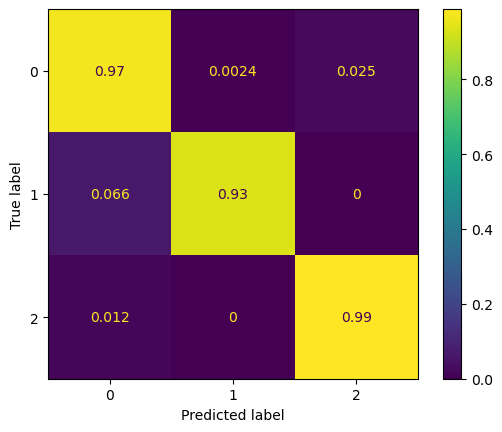

In [175]:
# answer
from sklearn.neural_network import MLPClassifier
print("Classifying using Multi Layer Perceptron Classifier")

# re-scale the data
scaler = MinMaxScaler()
sdss_scaled_features = scaler.fit_transform(sdss_features)
sdss_scaled = pd.DataFrame(sdss_scaled_features, columns = sdss_features.columns)
sdss_normalized = sdss_scaled.drop(columns='reduced')


# Split into test and training
X_train, X_test, y_train, y_test = train_test_split(sdss_normalized, y_encoded, test_size=0.33, random_state=42)


# model design

# Fitting the model to training data
scaler_mlp = MLPClassifier()
scaler_mlp.fit(X_train, y_train)


# Testing the model on test data
y_predict = scaler_mlp.predict(X_test)


plot_confusion_matrix(scaler_mlp, X_test, y_test, normalize='true') 
# print the classification report
print(classification_report(y_test, y_predict, target_names = label_name, output_dict=False))

# save values of precision, recall, fscore, accuracy.
report_mlp = classification_report(y_test, y_predict, target_names = label_name, output_dict=True)
prec_mlp, rec_mlp, f1_mlp, _ = score(y_test, y_predict, average='weighted')

## Logistic Regression

Classifying using Logistic Regression
              precision    recall  f1-score   support

      Galaxy       0.87      0.86      0.86      1633
      Quasar       0.99      0.84      0.91       320
        Star       0.83      0.87      0.85      1347

    accuracy                           0.86      3300
   macro avg       0.90      0.86      0.87      3300
weighted avg       0.86      0.86      0.86      3300



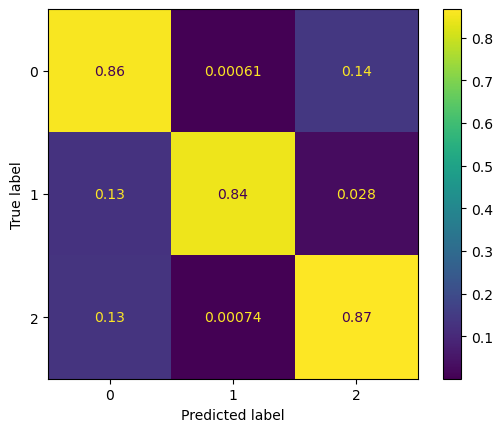

In [151]:
# answer
from sklearn.linear_model import LogisticRegression
print("Classifying using Logistic Regression")

# re-scale the data
scaler = MinMaxScaler()
sdss_scaled_features = scaler.fit_transform(sdss_features)
sdss_scaled = pd.DataFrame(sdss_scaled_features, columns = sdss_features.columns)
sdss_normalized = sdss_scaled.drop(columns='reduced')


# Split into test and training
X_train, X_test, y_train, y_test = train_test_split(sdss_normalized, y_encoded, test_size=0.33, random_state=42)


# model design

# Fitting the model to training data
scaler_lr = LogisticRegression()
scaler_lr.fit(X_train, y_train)


# Testing the model on test data
y_predict = scaler_lr.predict(X_test)


plot_confusion_matrix(scaler_lr, X_test, y_test, normalize='true') 
# print the classification report
print(classification_report(y_test, y_predict, target_names = label_name, output_dict=False))

# save values of precision, recall, fscore, accuracy.
report_lr = classification_report(y_test, y_predict, target_names = label_name, output_dict=True)



### 2.4 Model performance and comparison 

### 2.4.a Confusion Matrix and interpretation

**Task: Plot the confusion matrix (2 points)**

Use the sklearn function ``plot_confusion_matrix``. Find help here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html. We tested 5 models, make suplots, set the title on each subplots.


In [152]:
# plot the confusion matrix
X_train, X_test, y_train, y_test = train_test_split(sdss_normalized, y_encoded)
classifiers = [neigh, 
               scaler_gnb,
               scaler_rf, 
               scaler_svm, scaler_mlp, scaler_lr]
for cls in classifiers:
    cls.fit(X_train, y_train)

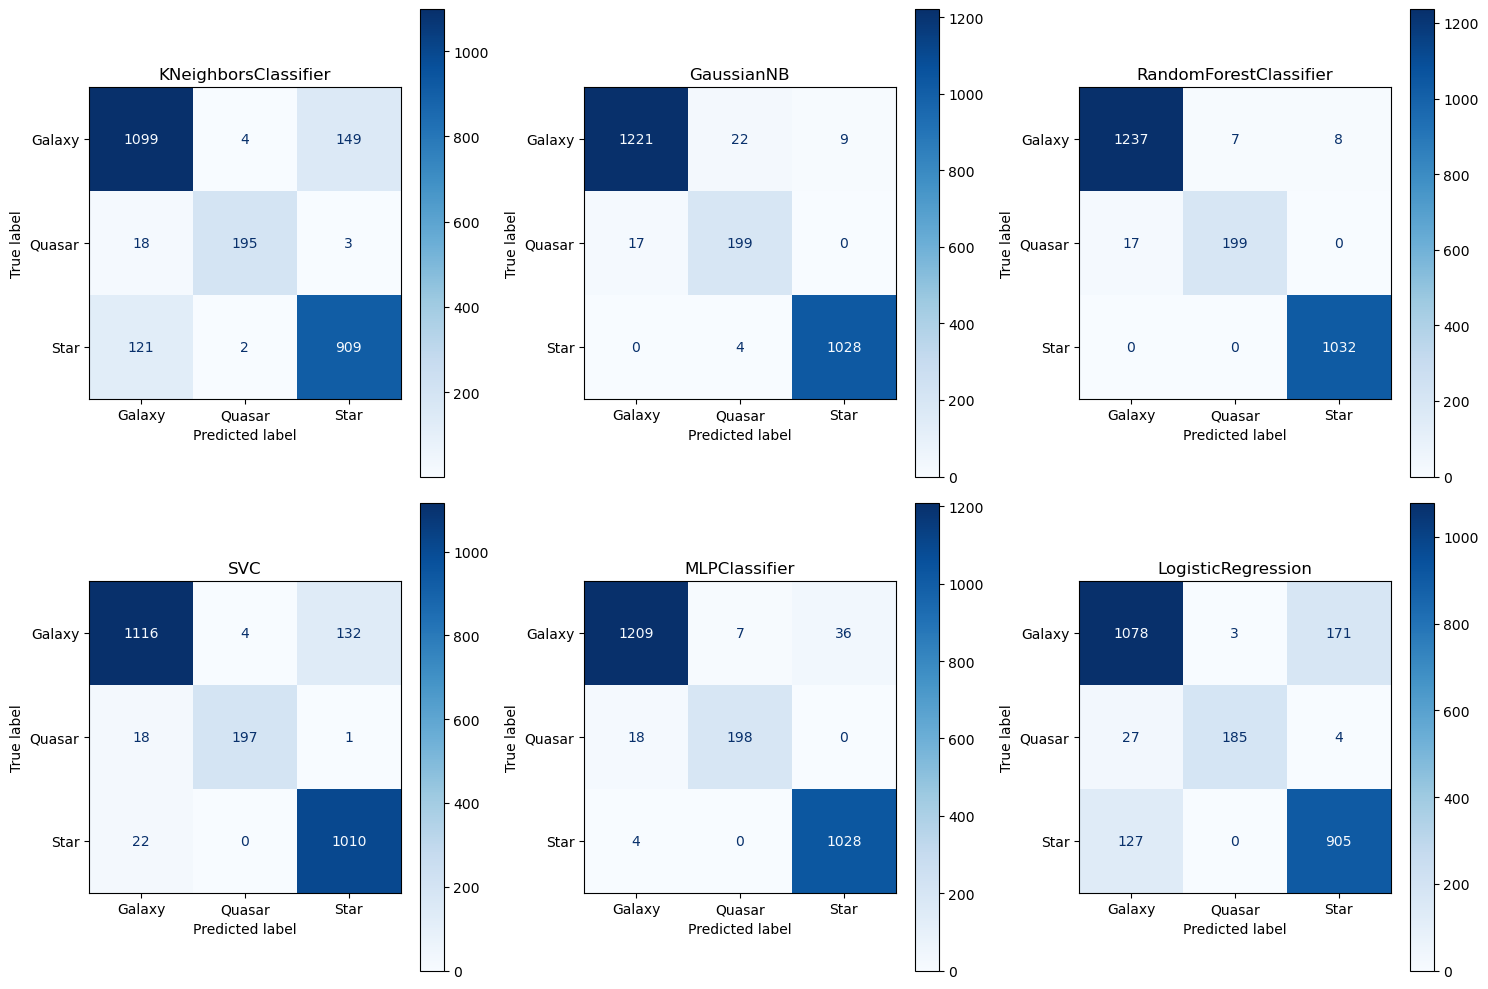

In [153]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                         display_labels=label_name)
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

**Task: Comment on what you see the best classifier is likely to be (1 point).** You can also comment on the misclassification and confusion rates.

#### Random Forest ofcourse! ;-)

### 2.4.a K Fold Cross Validation
We will now perform k fold cross valdiation for the classifiers. We use the function ``cross_val_score`` on each ewstimator, on the training set, with 10 folds, and use accuracy as a score metric.

**Task: perform the cross validation over K folds, output the mean and standard deviation of the accuracy (3 points)**

In [159]:
from sklearn.model_selection import cross_val_score

scores_knn = cross_val_score(neigh, sdss_normalized, y_encoded, cv =10)
scores_gnb = cross_val_score(scaler_gnb, sdss_normalized, y_encoded, cv =10)
scores_rf = cross_val_score(scaler_rf, sdss_normalized, y_encoded, cv =10)
scores_svm = cross_val_score(scaler_svm, sdss_normalized, y_encoded, cv =10)
scores_mlp = cross_val_score(scaler_mlp, sdss_normalized, y_encoded, cv =10)
scores_lr = cross_val_score(scaler_lr, sdss_normalized, y_encoded, cv =10)

print("K-nearest neighbors Mean:", scores_knn.mean(),"Standard Deviation:", scores_knn.std())
print("Gaussian Naive Bayes Mean:", scores_gnb.mean(),"Standard Deviation:", scores_gnb.std())
print("Random Forest Mean:", scores_rf.mean(),"Standard Deviation:", scores_rf.std())
print("Support Vector Machine Mean:", scores_svm.mean(),"Standard Deviation:", scores_svm.std())
print("Multi Layer Perceptron Mean:", scores_mlp.mean(),"Standard Deviation:", scores_mlp.std())
print("Logistic Regression Mean:", scores_lr.mean(),"Standard Deviation:", scores_lr.std())


K-nearest neighbors Mean: 0.8703 Standard Deviation: 0.017315022379425345
Gaussian Naive Bayes Mean: 0.9796000000000001 Standard Deviation: 0.006216108107168027
Random Forest Mean: 0.9896 Standard Deviation: 0.0035552777669262386
Support Vector Machine Mean: 0.9305999999999999 Standard Deviation: 0.005868560300448461
Multi Layer Perceptron Mean: 0.9797999999999998 Standard Deviation: 0.004142463035441599
Logistic Regression Mean: 0.8695999999999999 Standard Deviation: 0.010160708636704438


**Task: Which method won the Xval test (1 point) ?**

see the cell below

<!-- answer here -->





### 2.4.c And the winner is ... Random Forest!

Let's compare the results. 
**Task: Create a pandas dataframe with all of the performance metrics, including the results from K-fold cross validation. (2 points)**

In [168]:
report_svm['Galaxy']

{'precision': 0.9535036018336608,
 'recall': 0.8916105327617881,
 'f1-score': 0.9215189873417722,
 'support': 1633}

In [182]:
# create data frame
results = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 'Random Forest', 'SVC','ANN'],
    'Accuracy': [report_kne['accuracy'], report_gnb['accuracy'], report_rf['accuracy'], report_svm['accuracy'], report_mlp['accuracy']],
    'Precision': [prec_kne, prec_gnb, prec_rf, prec_svm, prec_mlp],
    'Recall': [rec_kne, rec_gnb, rec_rf, rec_svm, rec_mlp],
    'Fscore': [f1_kne, f1_gnb, f1_rf, f1_svm, f1_mlp],
    'Kfold_accuracy_mean': [scores_knn.mean(),scores_gnb.mean(),scores_rf.mean(),scores_svm.mean(),scores_mlp.mean()],
    'Kfold_accuracy_std': [scores_knn.std(), scores_gnb.std(), scores_rf.std(), scores_svm.std(), scores_mlp.std(),]})
# sort values by the Fscore with the greatest value first.

results.sort_values('Fscore', ascending=False)

Model  Accuracy  Precision    Recall    Fscore  \
2  Random Forest  0.990000   0.989986  0.990000  0.989933   
1    Naive Bayes  0.980606   0.981029  0.980606  0.980758   
4            ANN  0.975152   0.975255  0.975152  0.975097   
3            SVC  0.924242   0.927318  0.924242  0.924328   
0            KNN  0.881200   0.882054  0.881200  0.881439   

   Kfold_accuracy_mean  Kfold_accuracy_std  
2               0.9896            0.003555  
1               0.9796            0.006216  
4               0.9798            0.004142  
3               0.9306            0.005869  
0               0.8703            0.017315

**Task: Comment on the accuracy and performance and choose a winner. (1 point)**

see the cell below

<!-- answer here -->


You know - The one and only "Random Forest"!



## 3 Summary (4 points)

### 3.1 Feature Importance using Random Forest Classifier

Decision Trees have the unique property of being able to order features by their ability to split between the classes. If some features dominate over other in the predictive power of classes, one can further reduce the dimension of the features for additional analysis. The vector of feature importance is the module ``rfc.feature_importances_``, sorted with ascending importance. Store the vector of importance .

**Task: plot a bar plot using the function ``matplotlib.pyplot.bar``. (2 points)**

Classifying using Random Forest Classifiers
Elapsed time to compute the importances: 0.011 seconds


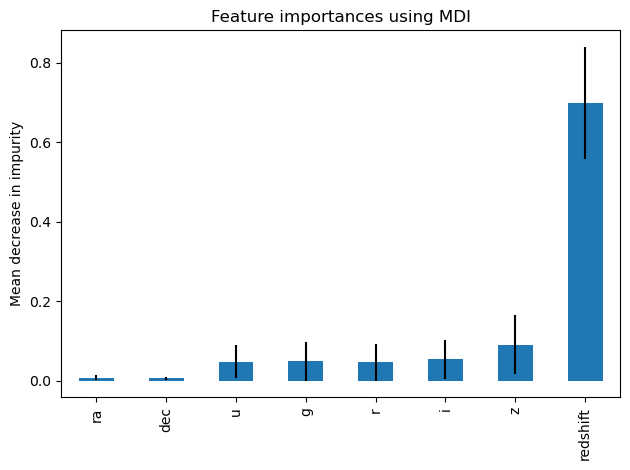

In [186]:
# answer
from sklearn.ensemble import RandomForestClassifier
print("Classifying using Random Forest Classifiers")

forest = RandomForestClassifier()

forest.fit(X_train, y_train)

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

import pandas as pd

forest_importances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# vector of importance

# vector of features



### The one with the reduced dimensions

Classifying using Random Forest Classifiers
Elapsed time to compute the importances: 0.010 seconds


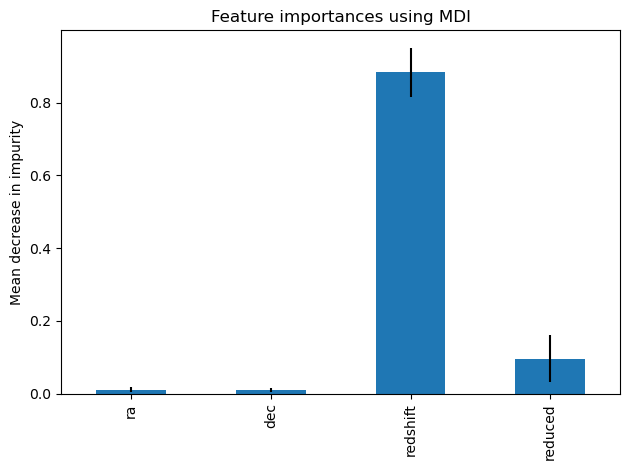

In [187]:
# answer
from sklearn.ensemble import RandomForestClassifier
print("Classifying using Random Forest Classifiers")

forest = RandomForestClassifier()

# Split into test and training
X_train, X_test, y_train, y_test = train_test_split(sdss_final, y_encoded, test_size=0.33, random_state=42)
forest.fit(X_train, y_train)

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

import pandas as pd

forest_importances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# vector of importance

# vector of features



**Task: What are the top three features (1 point)?**

enter in the cell below

<!-- answer -->

## 1. Red Shift, Z and 'g'.

In this notebook, you have learned that redshift was the best predictor of what object you are observing. Now, did you actualy need to do this all to find this out? Probably not if you were an astrophysicist! But hey, we are not. So great job!

**Task: Briefly comment on what you have learned (1 point)**

see the cell below

## Bonus questions (5 points)


Perform hyperparameter tuning and ensemble learning to improve on the classification performance.

In [188]:
# answer below


<!-- answer -->